In [1]:
import numpy as np
from optimization import newton, gradient_descent
from oracles import create_log_reg_oracle, grad_finite_diff, hess_finite_diff, QuadraticOracle
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from scipy.sparse import diags
%matplotlib inline

%load_ext autoreload
%autoreload 2

np.random.seed(42)

# Эксперимент 1

### Зависимость от числа обусловленности 

Число обусловленности:  1.0
status:  success
0.0 0.0


/home/roman/edu/Opt/plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


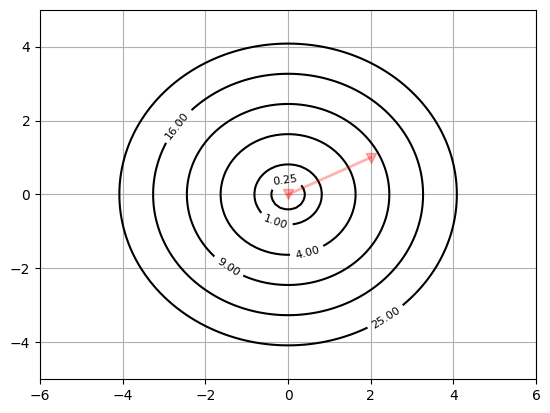

In [2]:
A_logreg=np.array([[3,0],[0,3]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)
print("Число обусловленности: ",np.linalg.cond(A_logreg))

x_k, status, history=gradient_descent(oracle, x_0=np.array([2,1]),trace=True, max_iter=10)
print("status: ",status)
print(*x_k)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

Число обусловленности:  1000.0
status:  success
0.0014130906862807211 -0.3012273554582428


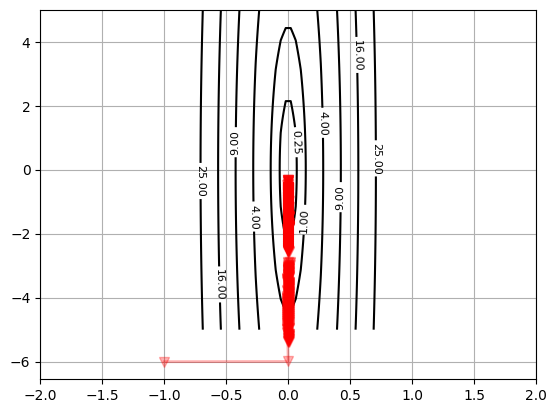

In [3]:
A_logreg=np.array([[100,0],[0,0.1]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)
print("Число обусловленности: ",np.linalg.cond(A_logreg))

x_k, status, history=gradient_descent(oracle, x_0=np.array([-1,-6]),trace=True, max_iter=1000, tolerance=1e-7)
print("status: ",status)
print(*x_k)
plot_levels(oracle.func,xrange=[-2,2])
plot_trajectory(oracle.func, history['x'])

### Зависимость от начальной точки

status:  success
-0.013347828455744642 0.013347828455744656


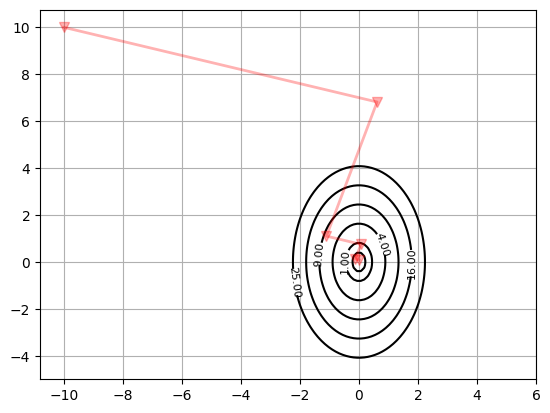

In [4]:
A_logreg=np.array([[10,0],[0,3]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)

x_k, status, history=gradient_descent(oracle, x_0=np.array([-10,10]),trace=True, max_iter=10)
print("status: ",status)
print(*x_k)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

success
success
success


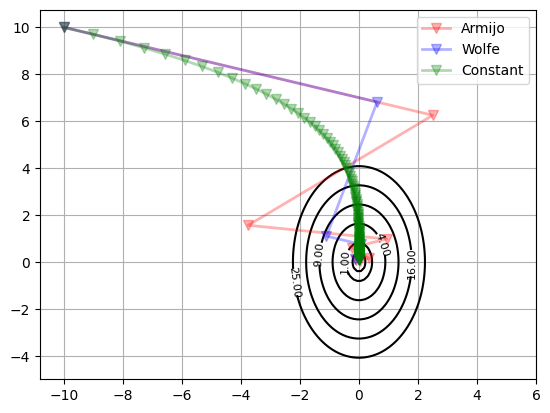

In [5]:
A_logreg=np.array([[10,0],[0,3]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', "c":0.01}
     ]
color=["r","b","g"]
plot_levels(oracle.func)
for i in range(3):
    x_opt, status, history = gradient_descent(oracle, np.array([-10,10]), line_search_options=ls[i], trace=True)
    plot_trajectory(oracle.func, history['x'],label=f"{ls[i]['method']}",color=color[i])
    print(status)
plt.legend()

status:  success
0.0 0.014242684529828999


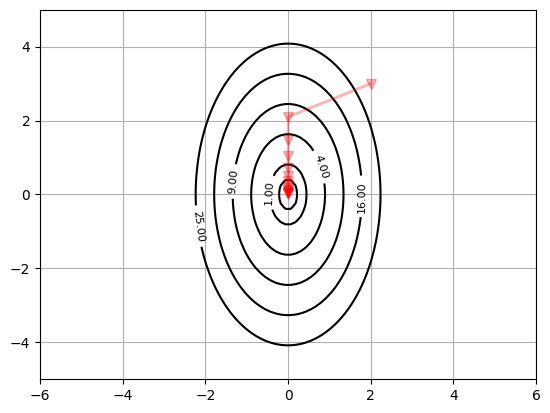

In [6]:
A_logreg=np.array([[10,0],[0,3]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)

x_k, status, history=gradient_descent(oracle, x_0=np.array([2,3]),line_search_options={"method":"Constant","c":0.1},trace=True, max_iter=20)
print("status: ",status)
print(*x_k)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

### Зависимость от стратегии выбора шага

success
success
success


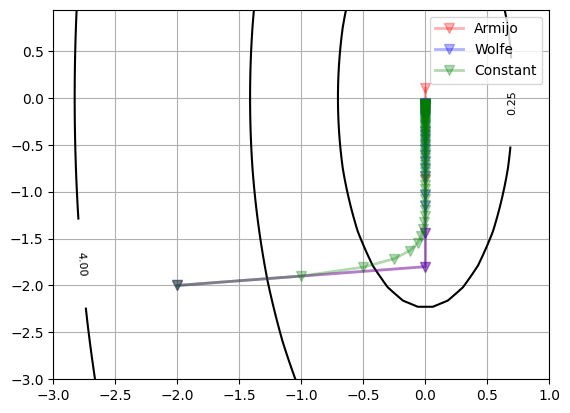

In [7]:
A_logreg=np.array([[1,0],[0,0.1]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', "c":0.5}
     ]
color=["r","b","g"]
plot_levels(oracle.func)
for i in range(3):
    x_opt, status, history = gradient_descent(oracle, np.array([-2, -2]), line_search_options=ls[i], trace=True)
    plot_trajectory(oracle.func, history['x'],label=f"{ls[i]['method']}", fit_axis=True,color=color[i])
    print(status)
plt.legend()

success
success
success


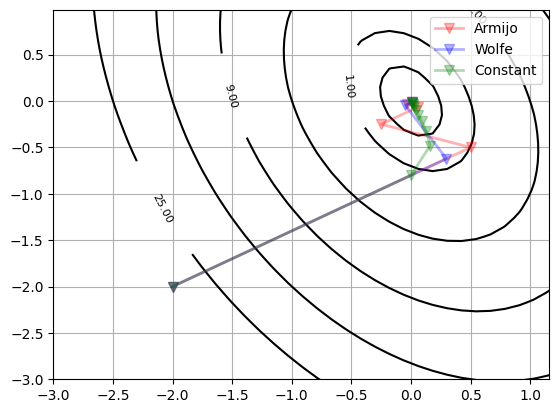

In [8]:
A_logreg=np.array([[8,2],[2,4]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', "c":0.1}
     ]
color=["r","b","g"]
plot_levels(oracle.func)
for i in range(3):
    x_opt, status, history = gradient_descent(oracle, np.array([-2, -2]), line_search_options=ls[i], trace=True)
    plot_trajectory(oracle.func, history['x'],label=f"{ls[i]['method']}", fit_axis=True,color=color[i])
    print(status)
plt.legend()

success
success
success


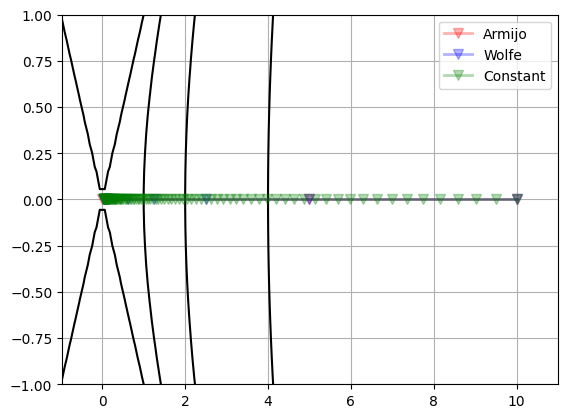

In [9]:
A_logreg=np.array([[0.5,0],[0,-0.5]])
b=np.array([0,0])
oracle=QuadraticOracle(A_logreg,b)
ls = [
    {'method': 'Armijo'},
    {'method': 'Wolfe'},
    {'method': 'Constant', "c":0.1}
     ]
color=["r","b","g"]
plot_levels(oracle.func)
for i in range(3):
    x_opt, status, history = gradient_descent(oracle, np.array([10, 0]), line_search_options=ls[i], trace=True)
    plot_trajectory(oracle.func, history['x'],label=f"{ls[i]['method']}", fit_axis=True,color=color[i])
    print(status)
plt.legend()

# Эксперимент 2

In [10]:
def generate_matrix(k,n):
    if k==1:
        diag=np.random.randint(1,n,size=1)*np.ones(n)
    else:
        diag=np.random.randint(1,k,size=n)
        diag[0]=1
        diag[1]=k
        np.random.shuffle(diag)
    return diags(diag).toarray()

In [11]:
dim=[10,100,1000,10000]
colors=["red","green","orange","black"]
cond=[1,10,100,1000,10000]

for count in range(10):
    print(count)
    for i,n in enumerate(dim):
        y=[]
        for k in cond:
            A_logreg=generate_matrix(k,n)  
            b=np.random.normal(size=(n))  
            oracle = QuadraticOracle(A_logreg, b)
            x_opt, status, history = gradient_descent(oracle, np.zeros(n), trace=True)
            y.append(len(history['func']))

        plt.plot(cond, y, "--o",c=colors[i],label=n)

plt.grid()
plt.xlabel('$\kappa$')
plt.ylabel('iter')
plt.legend(["n=10","n=100","n=1000","n=10000"])
plt.xscale('log',base=10)


# Эксперимент 3

In [12]:
X, y = load_svmlight_file('./data/w8a.txt',dtype=np.short)
oracle = create_log_reg_oracle(X, y, regcoef=1/X.shape[-1])

x_opt, _, hist_grad = gradient_descent(oracle, x_0=np.zeros(X.shape[1]),trace=True)
x_opt, _, hist_newton = newton(oracle, x_0=np.zeros(X.shape[1]), trace=True)

In [13]:
def plot_all(hist_grad, hist_newton, dataset_name):
    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.plot(hist_grad["time"], hist_grad["func"], c="orange", label="Gradient Descent")
    ax1.plot(hist_newton["time"], hist_newton["func"], c="green", label="Newton")
    ax1.grid()
    ax1.set(ylabel='f(x)')
    
    ax2.plot(hist_grad["time"], np.log(hist_grad["relative_norm"]), c="orange", label="Gradient Descent")
    ax2.plot(hist_newton["time"], np.log(hist_newton["relative_norm"]), c="green", label="Newton")
    ax2.grid()
    ax2.set(xlabel='time', ylabel=r'$\log\frac{\left\|\|\nabla f\left(x_k\right)\right\|\|_2^2}{\left\|\|\nabla f\left(x_0\right)\right\|\|_2^2}$')

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center')

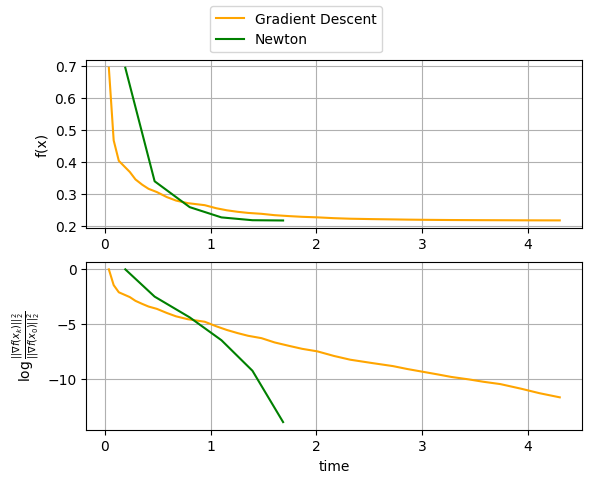

In [14]:
plot_all(hist_grad, hist_newton, 'w8a')

Аналогично был проведен эксперимент для других данных. Но из-за того, что моему компьютеру не хватало памяти, результаты по real-sim и gisette были получены на кагле.

# Эксперимент 4

In [15]:
grid = [{'method': 'Constant', 'c': 1.0},
       {'method': 'Constant', 'c': 0.1},
       {'method': 'Constant', 'c': 0.01},
       {'method': 'Armijo', 'alpha_0': 1.0},
       {'method': 'Armijo', 'alpha_0': 0.1},
       {'method': 'Armijo', 'alpha_0': 0.01},
       {'method': 'Wolfe', 'c2': 0.9},
       {'method': 'Wolfe', 'c2': 0.1},
       {'method': 'Wolfe', 'c2': 0.01}]

In [16]:
A_quad = np.array([[32, 0],[0, 4]])
b = np.array([0, 0])
oracle_quad = QuadraticOracle(A_quad, b)

A_logreg = np.random.rand(1000, 100)
y = np.random.choice([-1,1],size=1000)
oracle_logreg = create_log_reg_oracle(A_logreg, y, regcoef=1/100)

res = []
norm = []
it_quad = []
it_logreg = []

x0_logreg=np.random.randint(5, 15, size=100)
for i, ls in enumerate(grid):
    method, const=ls.values()
    print(method, const)

    x_star_quad, status_quad, history_quad = gradient_descent(oracle_quad, x_0=[15, -15], line_search_options=ls, trace=True)
    x_star_logreg, status_logreg, history_logreg = gradient_descent(oracle_logreg, x_0=x0_logreg, line_search_options=ls, trace=True)
    
    print("    Quad\n       Status: ", status_quad, "\n       Function value at the end: ", history_quad['func'][-1])
    print("    LogReg\n       Status: ", status_logreg, "\n       Function value at the end: ", history_logreg['func'][-1],"\n")

    res.append(history_quad['func'])
    norm.append(history_logreg['relative_norm'])
    it_quad.append(len(history_quad['x']))
    it_logreg.append(len(history_logreg['x']))

Constant 1.0
    Quad
       Status:  computational_error 
       Function value at the end:  6.22426454657152e+307
    LogReg
       Status:  iterations_exceeded 
       Function value at the end:  3.846365999850118 

Constant 0.1
    Quad
       Status:  computational_error 
       Function value at the end:  8.765924165776362e+306
    LogReg
       Status:  success 
       Function value at the end:  0.6515038157266262 

Constant 0.01
    Quad
       Status:  success 
       Function value at the end:  0.28975734985715523
    LogReg
       Status:  iterations_exceeded 
       Function value at the end:  1.0578439805469428 

Armijo 1.0
    Quad
       Status:  success 
       Function value at the end:  0.2731454033339631
    LogReg
       Status:  success 
       Function value at the end:  0.6504795588484404 

Armijo 0.1
    Quad
       Status:  success 
       Function value at the end:  0.0908403042608395
    LogReg
       Status:  success 
       Function value at the end:  0.65

In [17]:
names = []

for ls in grid:
    s = ''
    for key, value in ls.items():
        if key == 'method':
            s += f'{value} '
        else:
            s += f'{key}={value}'
    names.append(s)

In [18]:
colors = ['lightcoral', 'tomato', 'red', 'olive', 'lime','green', 'aqua', 'blue','indigo']

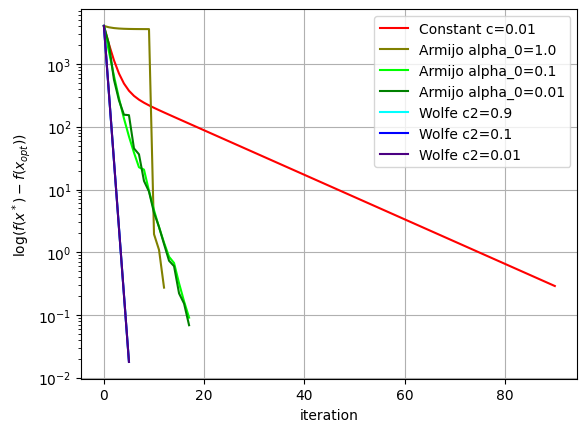

In [19]:
for i in range(2, len(res)):
    plt.plot(np.arange(it_quad[i]), np.array(res[i]), label=names[i], c=colors[i])

    
plt.xlabel('iteration')
plt.ylabel(r'$\log(f(x^*) - f(x_{opt}))$')
plt.yscale('log')
plt.grid()
plt.legend()

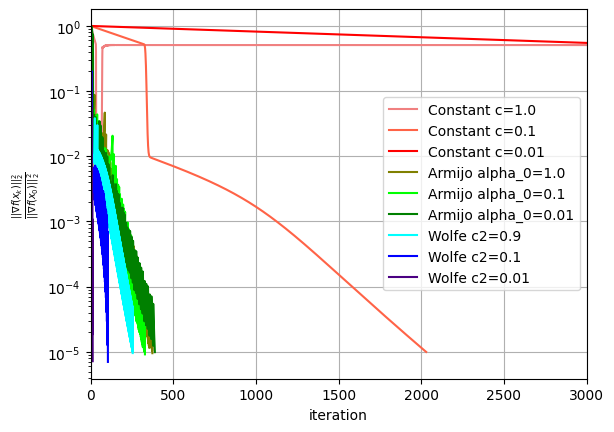

In [20]:
for i in range(len(res)):
    plt.plot(np.arange(it_logreg[i]), np.array(norm[i]), label=names[i], c=colors[i])

    
plt.xlabel('iteration')
plt.yscale('log')
plt.xlim([0,3000])
plt.ylabel(r'$\frac{\left\|\|\nabla f\left(x_k\right)\right\|\|_2^2}{\left\|\|\nabla f\left(x_0\right)\right\|\|_2^2}$')
plt.grid()
plt.legend()

# Эксперимент 5

In [21]:
A_logreg = np.random.rand(1000, 100)
y = np.random.choice([-1,1],size=1000)
oracle_logreg = create_log_reg_oracle(A_logreg, y, regcoef=1/100)

norm = []
it_logreg = []

x0_logreg=np.random.randint(5, 15, size=100)
for i, ls in enumerate(grid):
    method, const=ls.values()
    print(method, const)

    x_star_logreg, status_logreg, history_logreg = newton(oracle_logreg, x_0=x0_logreg, line_search_options=ls, trace=True)
    
    print("    LogReg\n       Status: ", status_logreg, "\n       Function value at the end: ", history_logreg['func'][-1],"\n")

    norm.append(history_logreg['relative_norm'])
    it_logreg.append(len(history_logreg['x']))

Constant 1.0
    LogReg
       Status:  iterations_exceeded 
       Function value at the end:  958.5166359239649 

Constant 0.1
    LogReg
       Status:  success 
       Function value at the end:  0.6679345541311571 

Constant 0.01
    LogReg
       Status:  iterations_exceeded 
       Function value at the end:  1.274751863975039 

Armijo 1.0
    LogReg
       Status:  success 
       Function value at the end:  0.6678452537721352 

Armijo 0.1
    LogReg
       Status:  success 
       Function value at the end:  0.6678452537721352 

Armijo 0.01
    LogReg
       Status:  success 
       Function value at the end:  0.6678452537721352 

Wolfe 0.9
    LogReg
       Status:  success 
       Function value at the end:  0.6678448854687743 

Wolfe 0.1
    LogReg
       Status:  success 
       Function value at the end:  0.6681198569031627 

Wolfe 0.01
    LogReg
       Status:  success 
       Function value at the end:  0.6678703529465233 



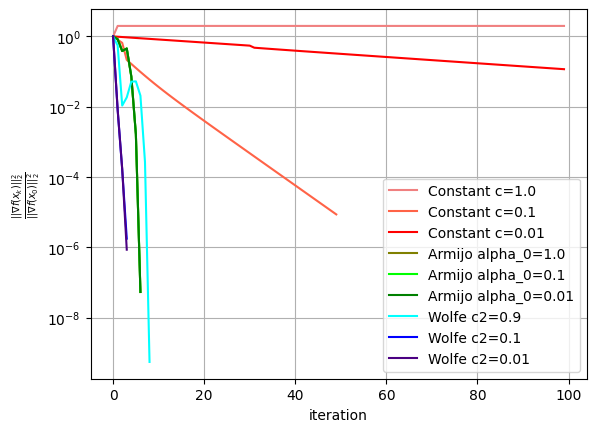

In [22]:
for i in range(len(norm)):
    plt.plot(np.arange(it_logreg[i]), np.array(norm[i]), label=names[i], c=colors[i])

    
plt.xlabel('iteration')
plt.yscale('log')
plt.ylabel(r'$\frac{\left\|\|\nabla f\left(x_k\right)\right\|\|_2^2}{\left\|\|\nabla f\left(x_0\right)\right\|\|_2^2}$')
plt.grid()
plt.legend()